<a href="https://colab.research.google.com/github/praveenvattem/ml_models/blob/master/indicGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Myself** 

I am currently working as a Senior Data Scientist at Mobile Premier League. In my free time I love exploring what is happening in the AI field. I am also a certified football coach, and I plan to pursue it post my tech career (or when AI takes over 🦌)

Connect with me on Twitter - https://twitter.com/AashaySachdeva

If you like the workshop, give my newsletter a subscribe - https://aashaysachdeva.substack.com/

# **The need for Large Language Models**

Most models out in the wild suffer from out of training set generalisation. If you model hasn't seen different languages, it cannot predict whatever the task it is given to do.

But what if we make the whole of internet (Human's biggest dataset) as Model's universe? This was the hypothesis around training GPT series for openAI. Very interesting properties start to emerge at this scale.

## **What is GPT?**

GPT stands for Generative Pre-trained Transformer. It is trained to predict the next word given a sentence.The GPT-2 was trained on a massive 40GB dataset called WebText that the OpenAI researchers crawled from the internet as part of the research effort. 
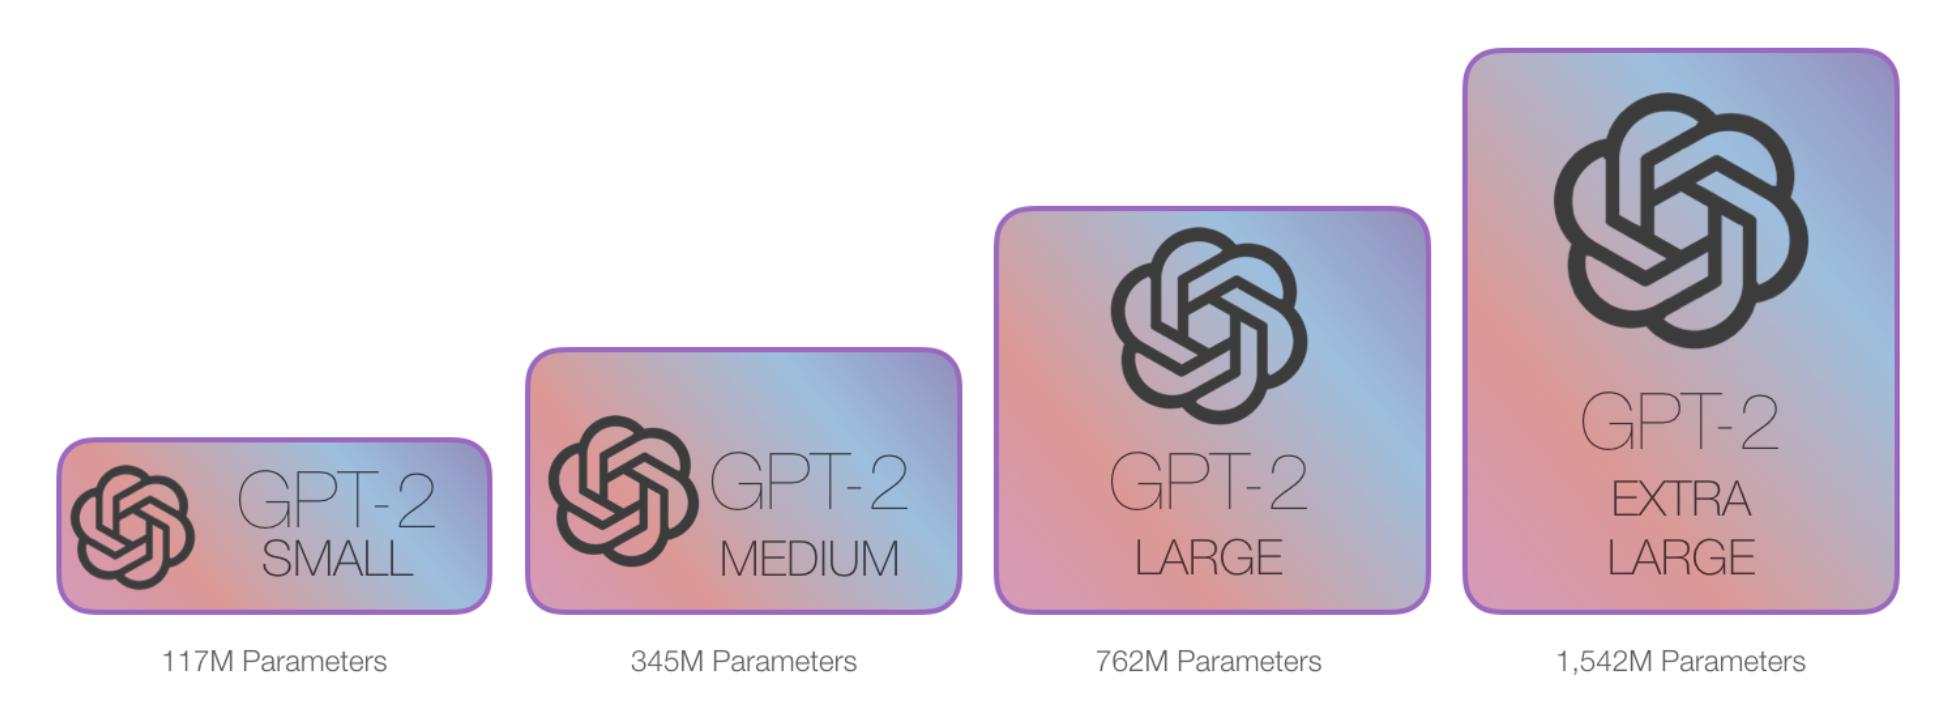

And then GPT-3, which has 175-Billion parameters!!

The model is trained via binary cross entropy, and tries to predict the next word by giving a vector of token with Probabilities.

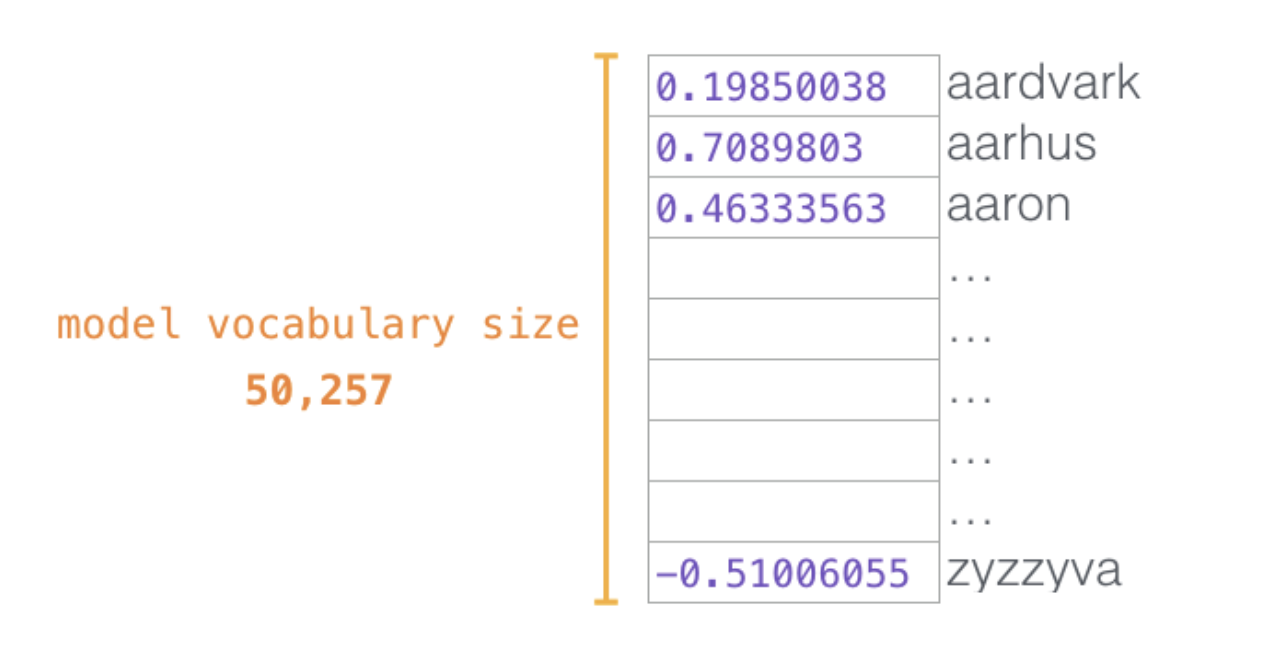

GPT-2 paper was called - Language Models are Unsupervised Multitask Learners. Why?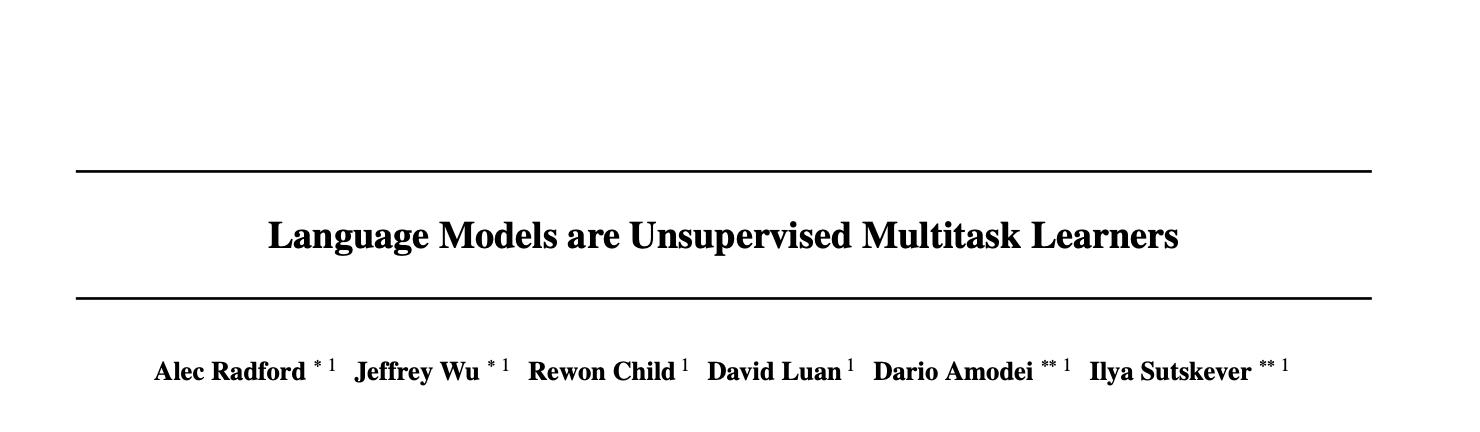



## **Prompt Engineering**

Simple interface to interact with the LLM.

Example, to perform translation,we condition the language model
on a context of example pairs of the format english
sentence = french sentence and then after a final prompt of english sentence = we sample from the model with greedy decoding and use the first generated
sentence as the translation. 

```
My name is Aashay - Je m'appelle Aashay
Your name is? - (Model Predicts)
```



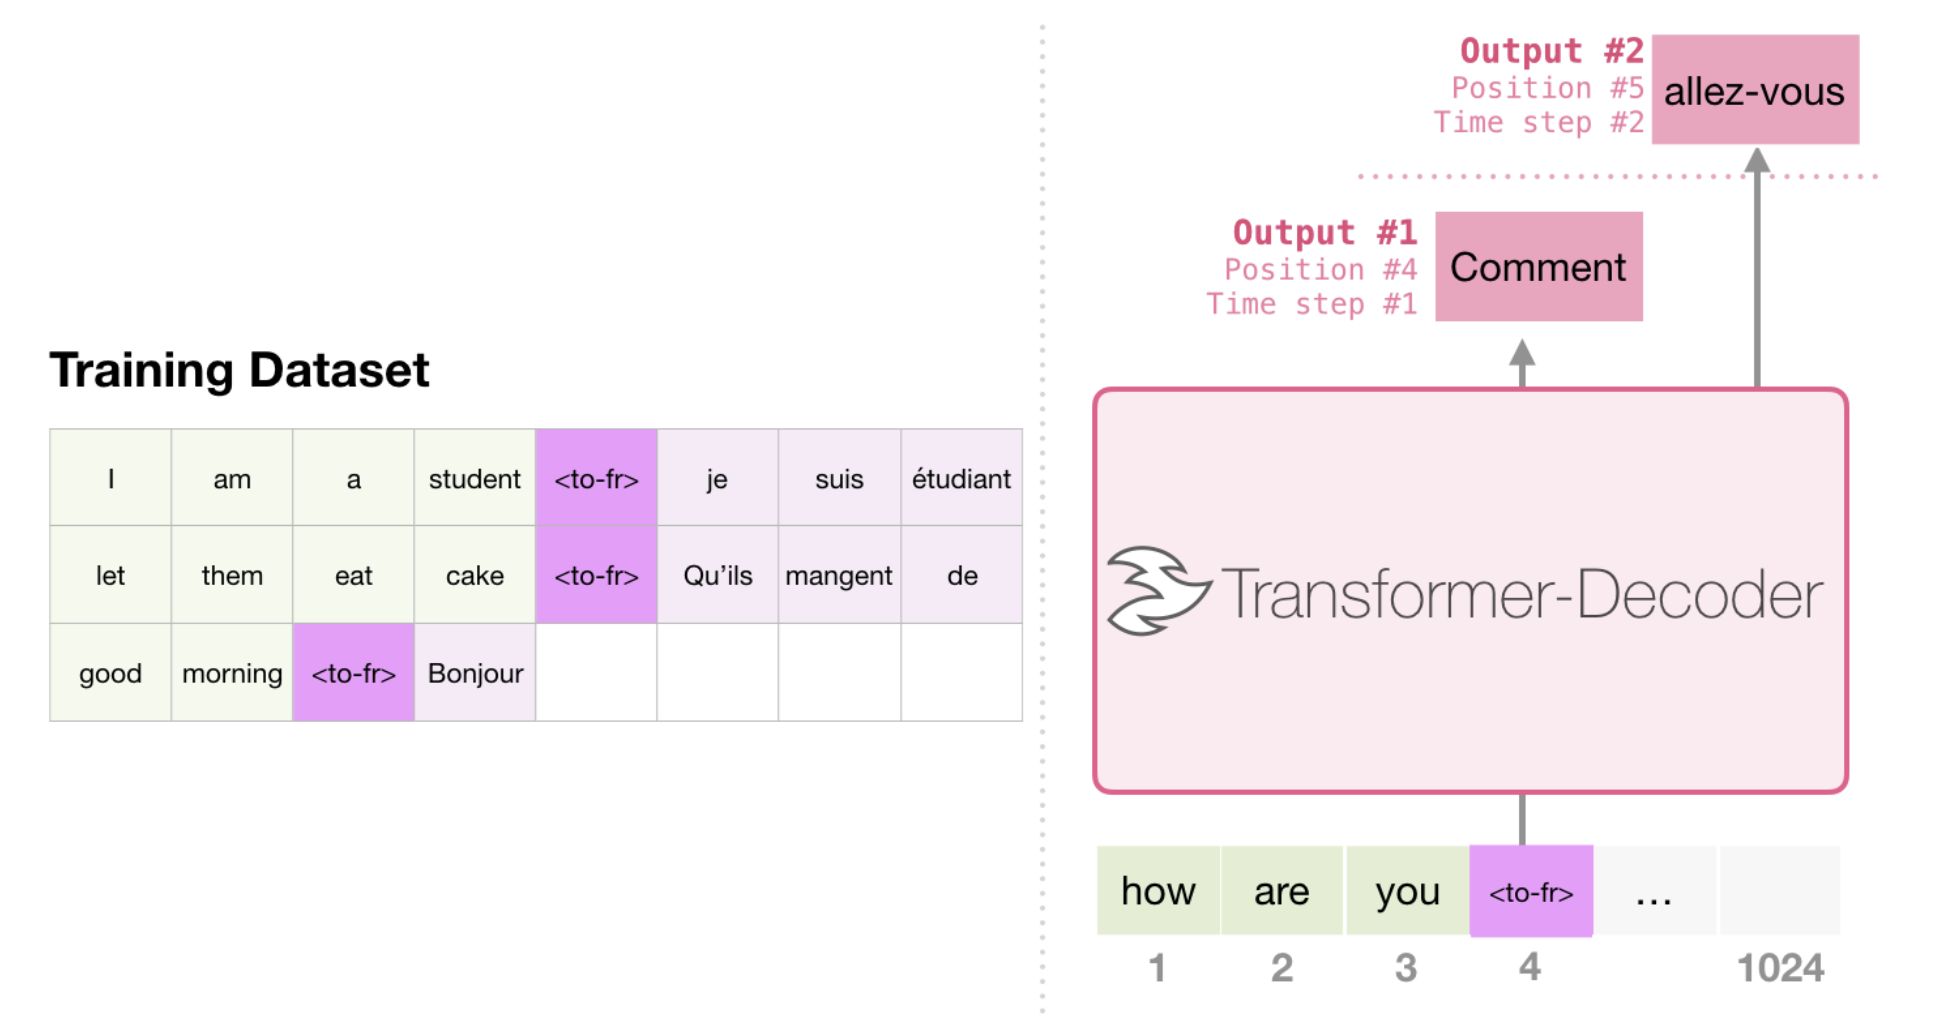

In [ ]:
!pip install datasets evaluate transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Raw Dataset is present at https://ai4bharat.org/datasets

Processed sample dataset for the session - https://huggingface.co/datasets/aashay96/indic-gpt

In [ ]:
from datasets import load_dataset

indic_dataset = load_dataset('aashay96/indic-gpt',data_files=['data/train-00020-of-00227-120d671fcd18bc1e.parquet'])

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/aashay96___parquet/aashay96--indic-gpt-87edb822a7e57d8c/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

## **Tokenizer**
Tokenizers are one of the core components of the NLP pipeline. They serve one purpose: to translate text into data that can be processed by the model. Models can only process numbers, so tokenizers need to convert our text inputs to numerical data.

In NLP tasks, the data that is generally processed is raw text. Here’s an example of such text:

```
# My name is Aashay
```

However, models can only process numbers, so we need to find a way to convert the raw text to numbers. That’s what the tokenizers do, and there are a lot of ways to go about this. The goal is to find the most meaningful representation — that is, the one that makes the most sense to the model — and, if possible, the smallest representation.

## BPE Tokenizer
BPE - Byte Pair Encoding, is a compression algorithm which was used as a tokenizer for GPT-2. (Picture credits: HuggingFace)

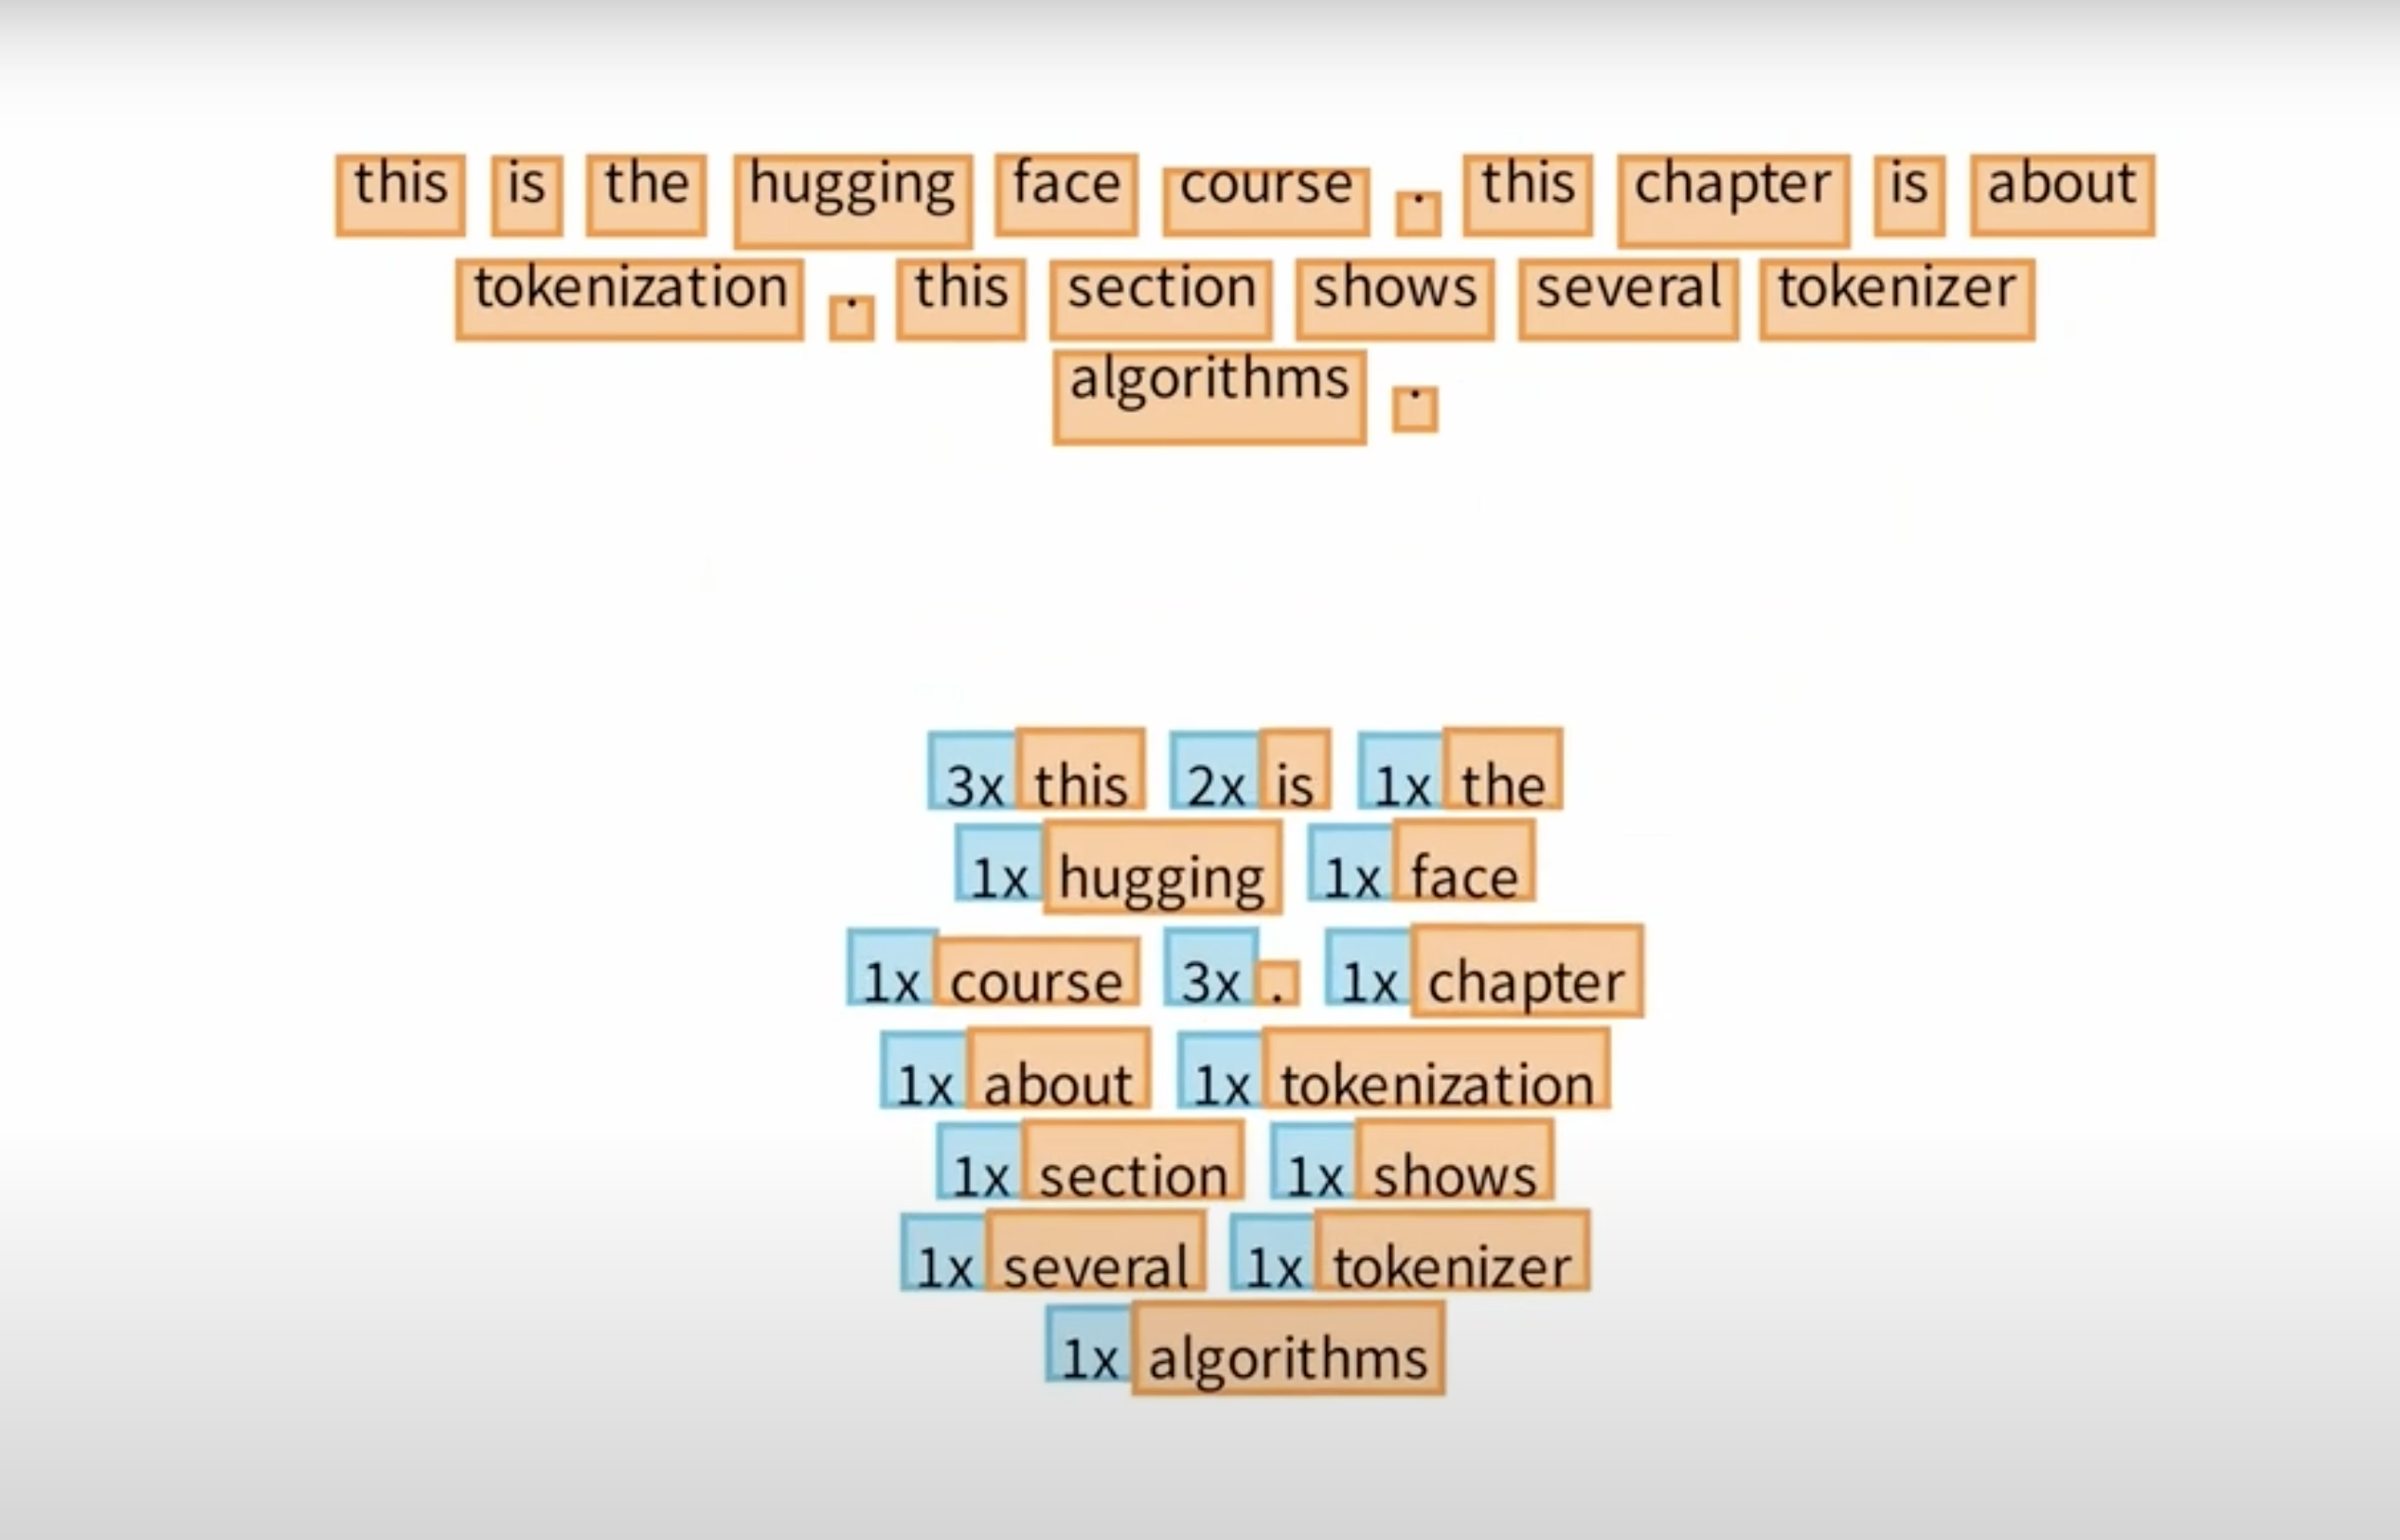

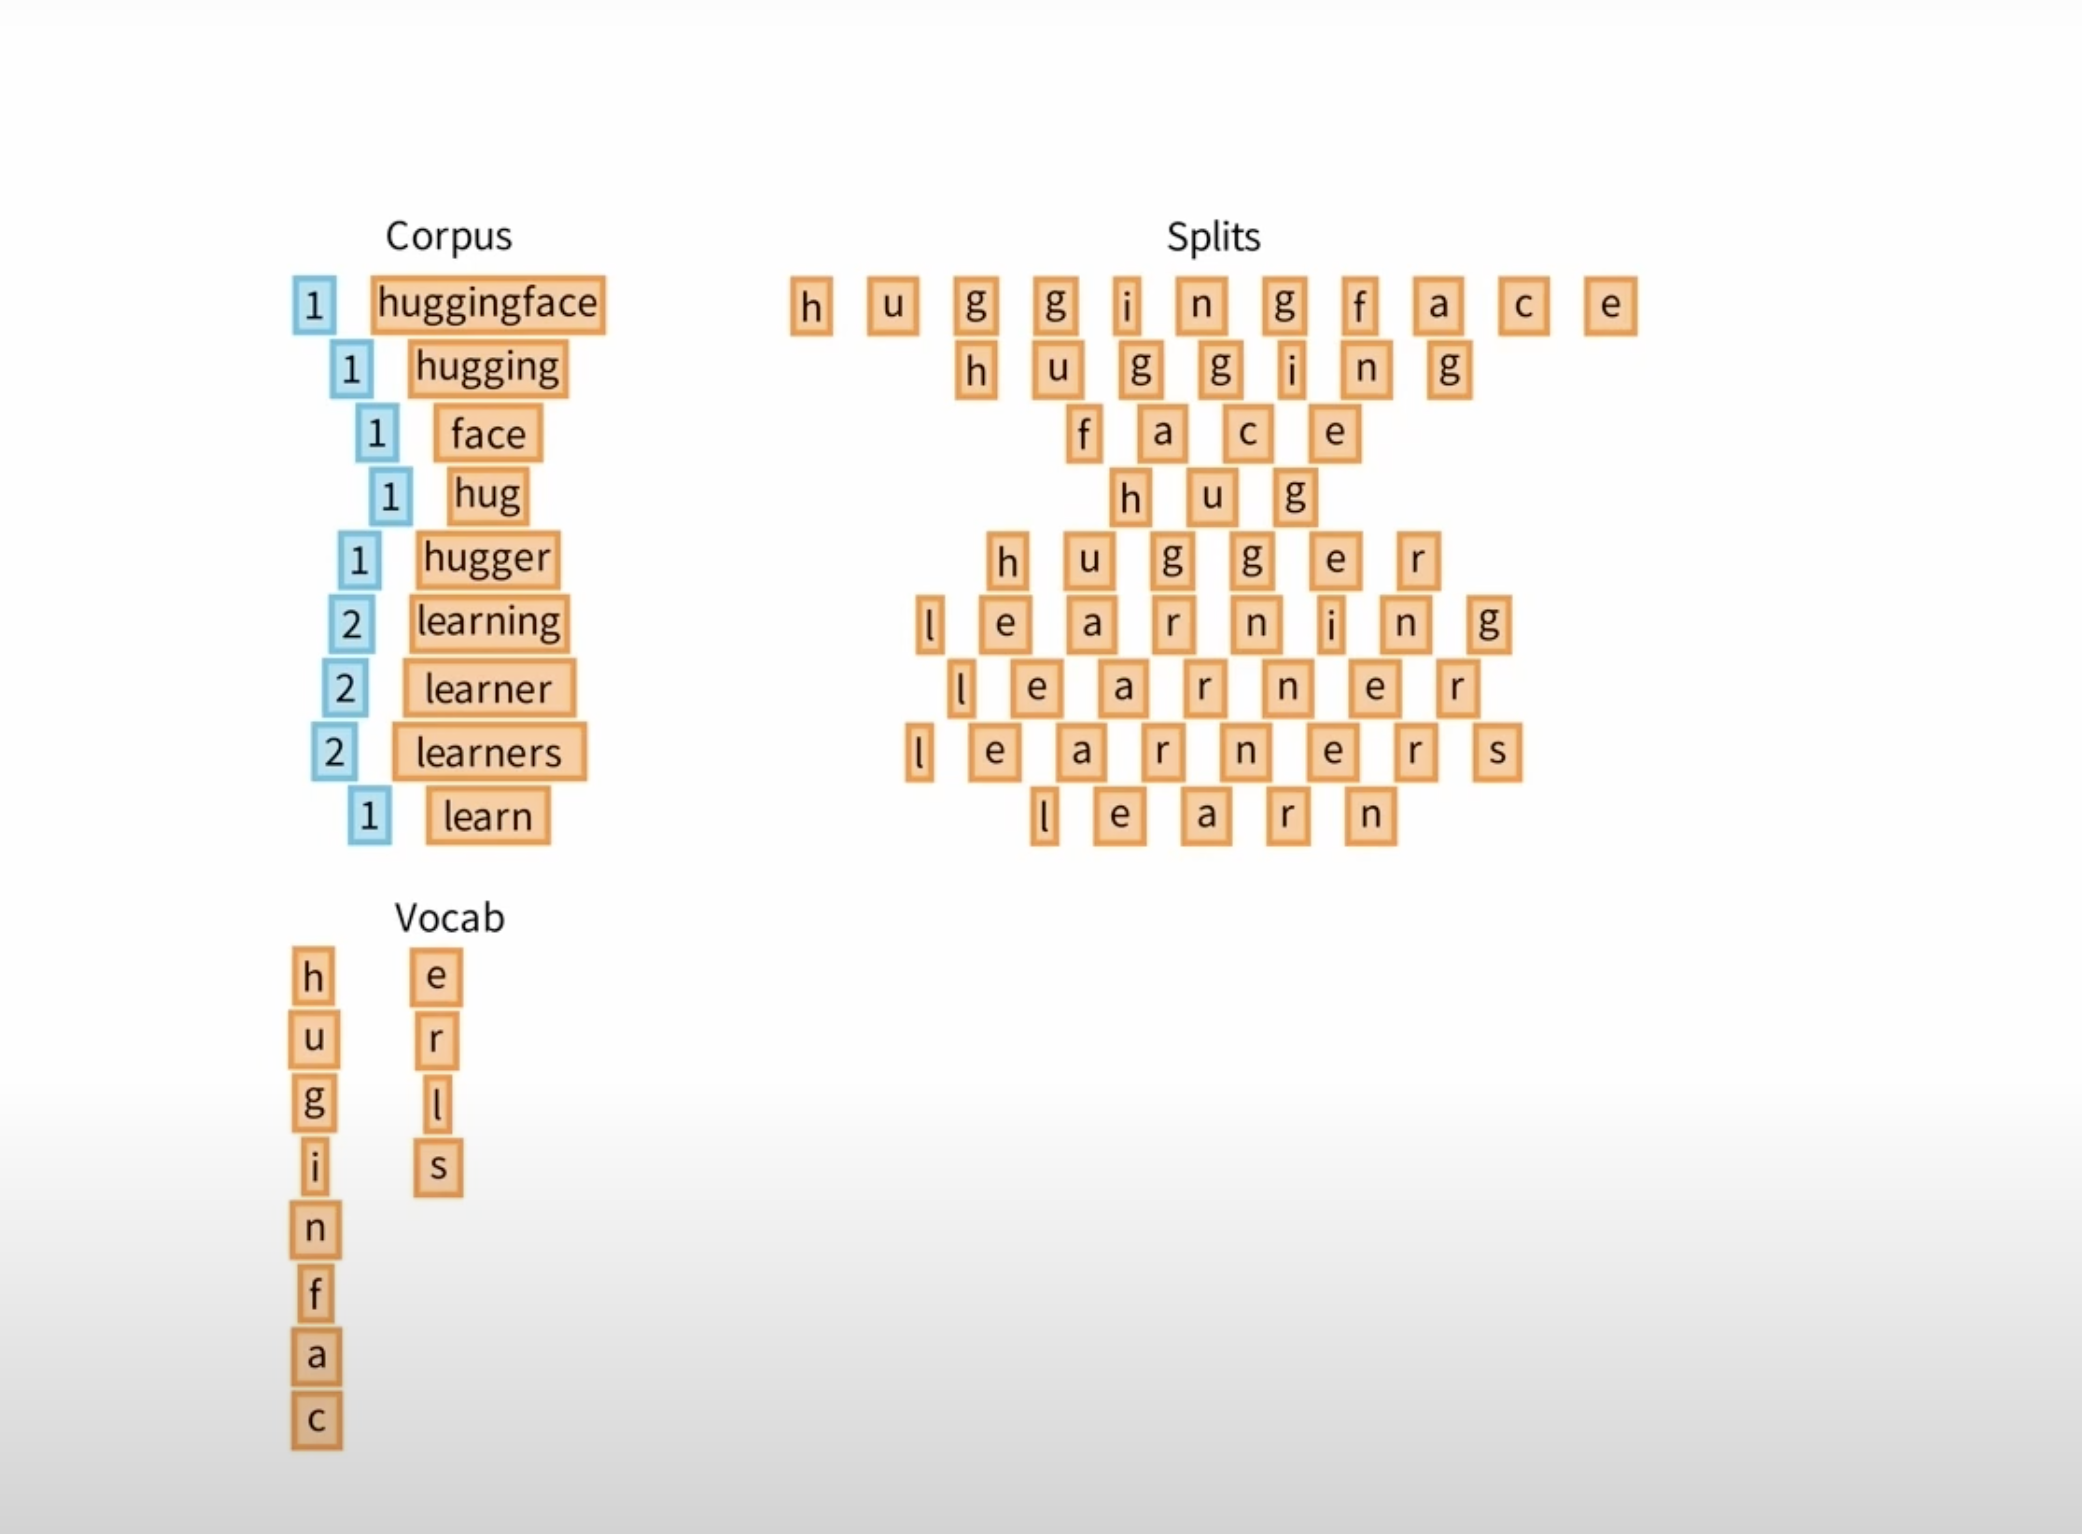

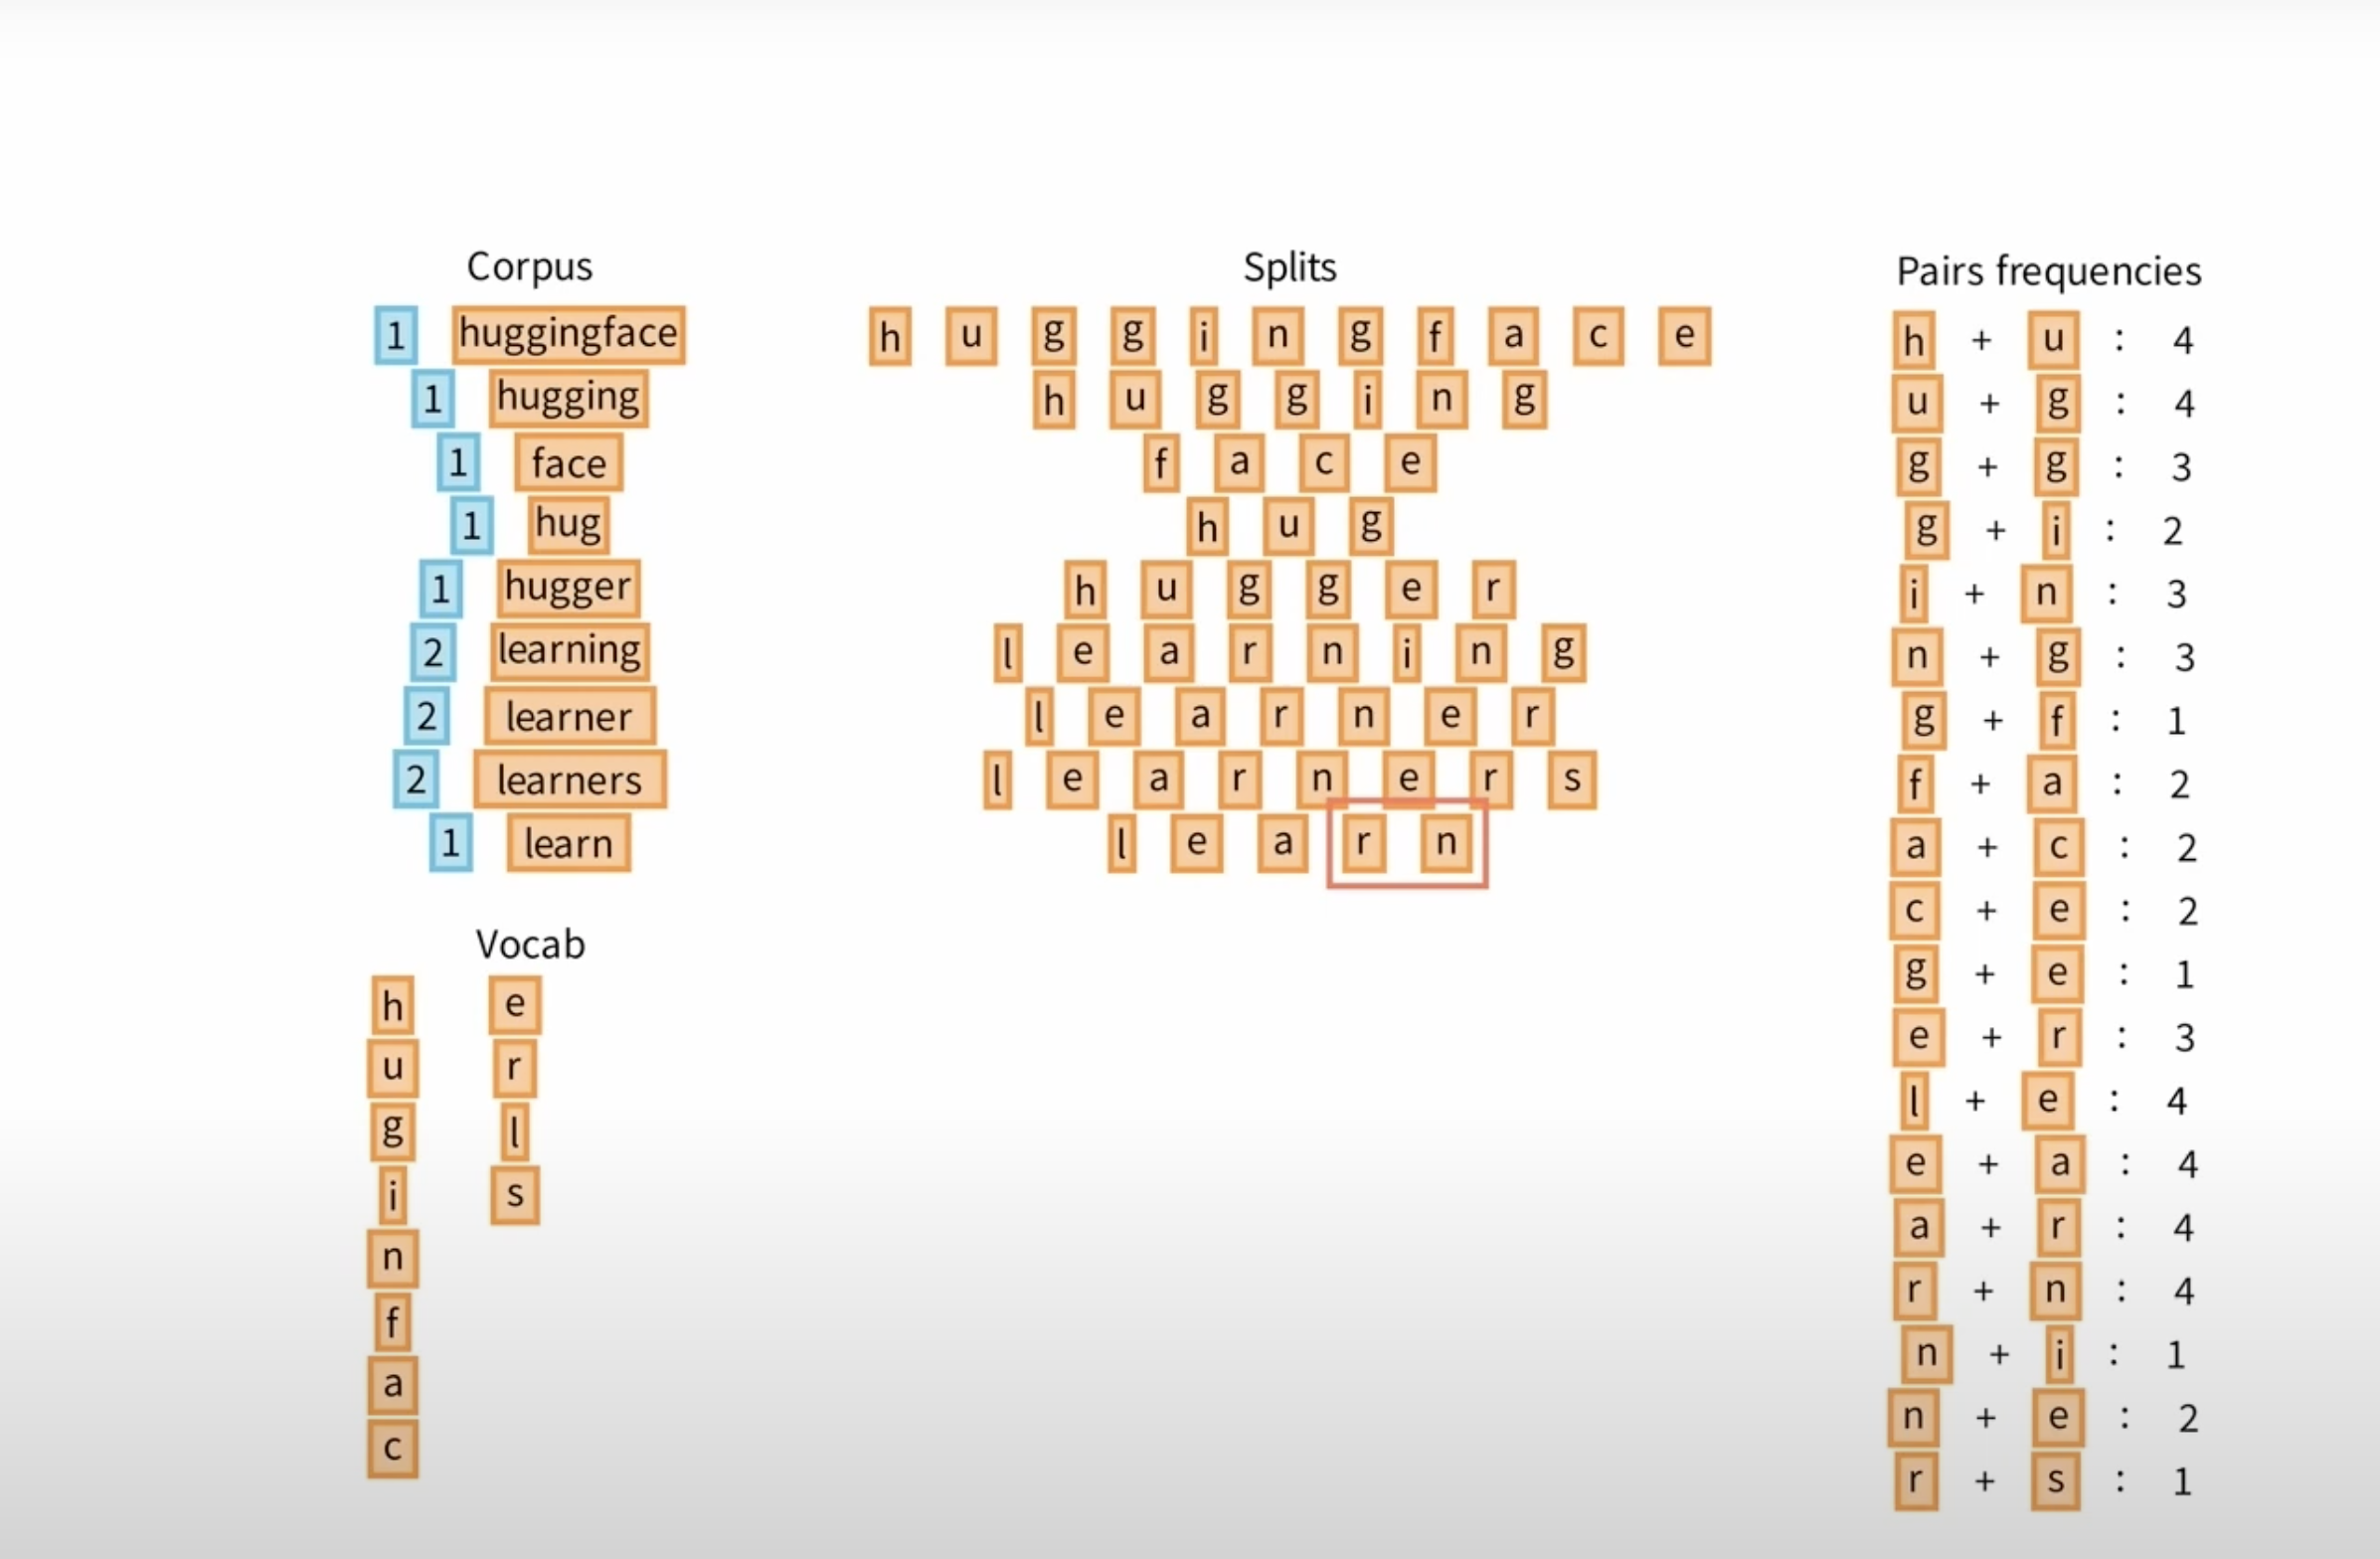

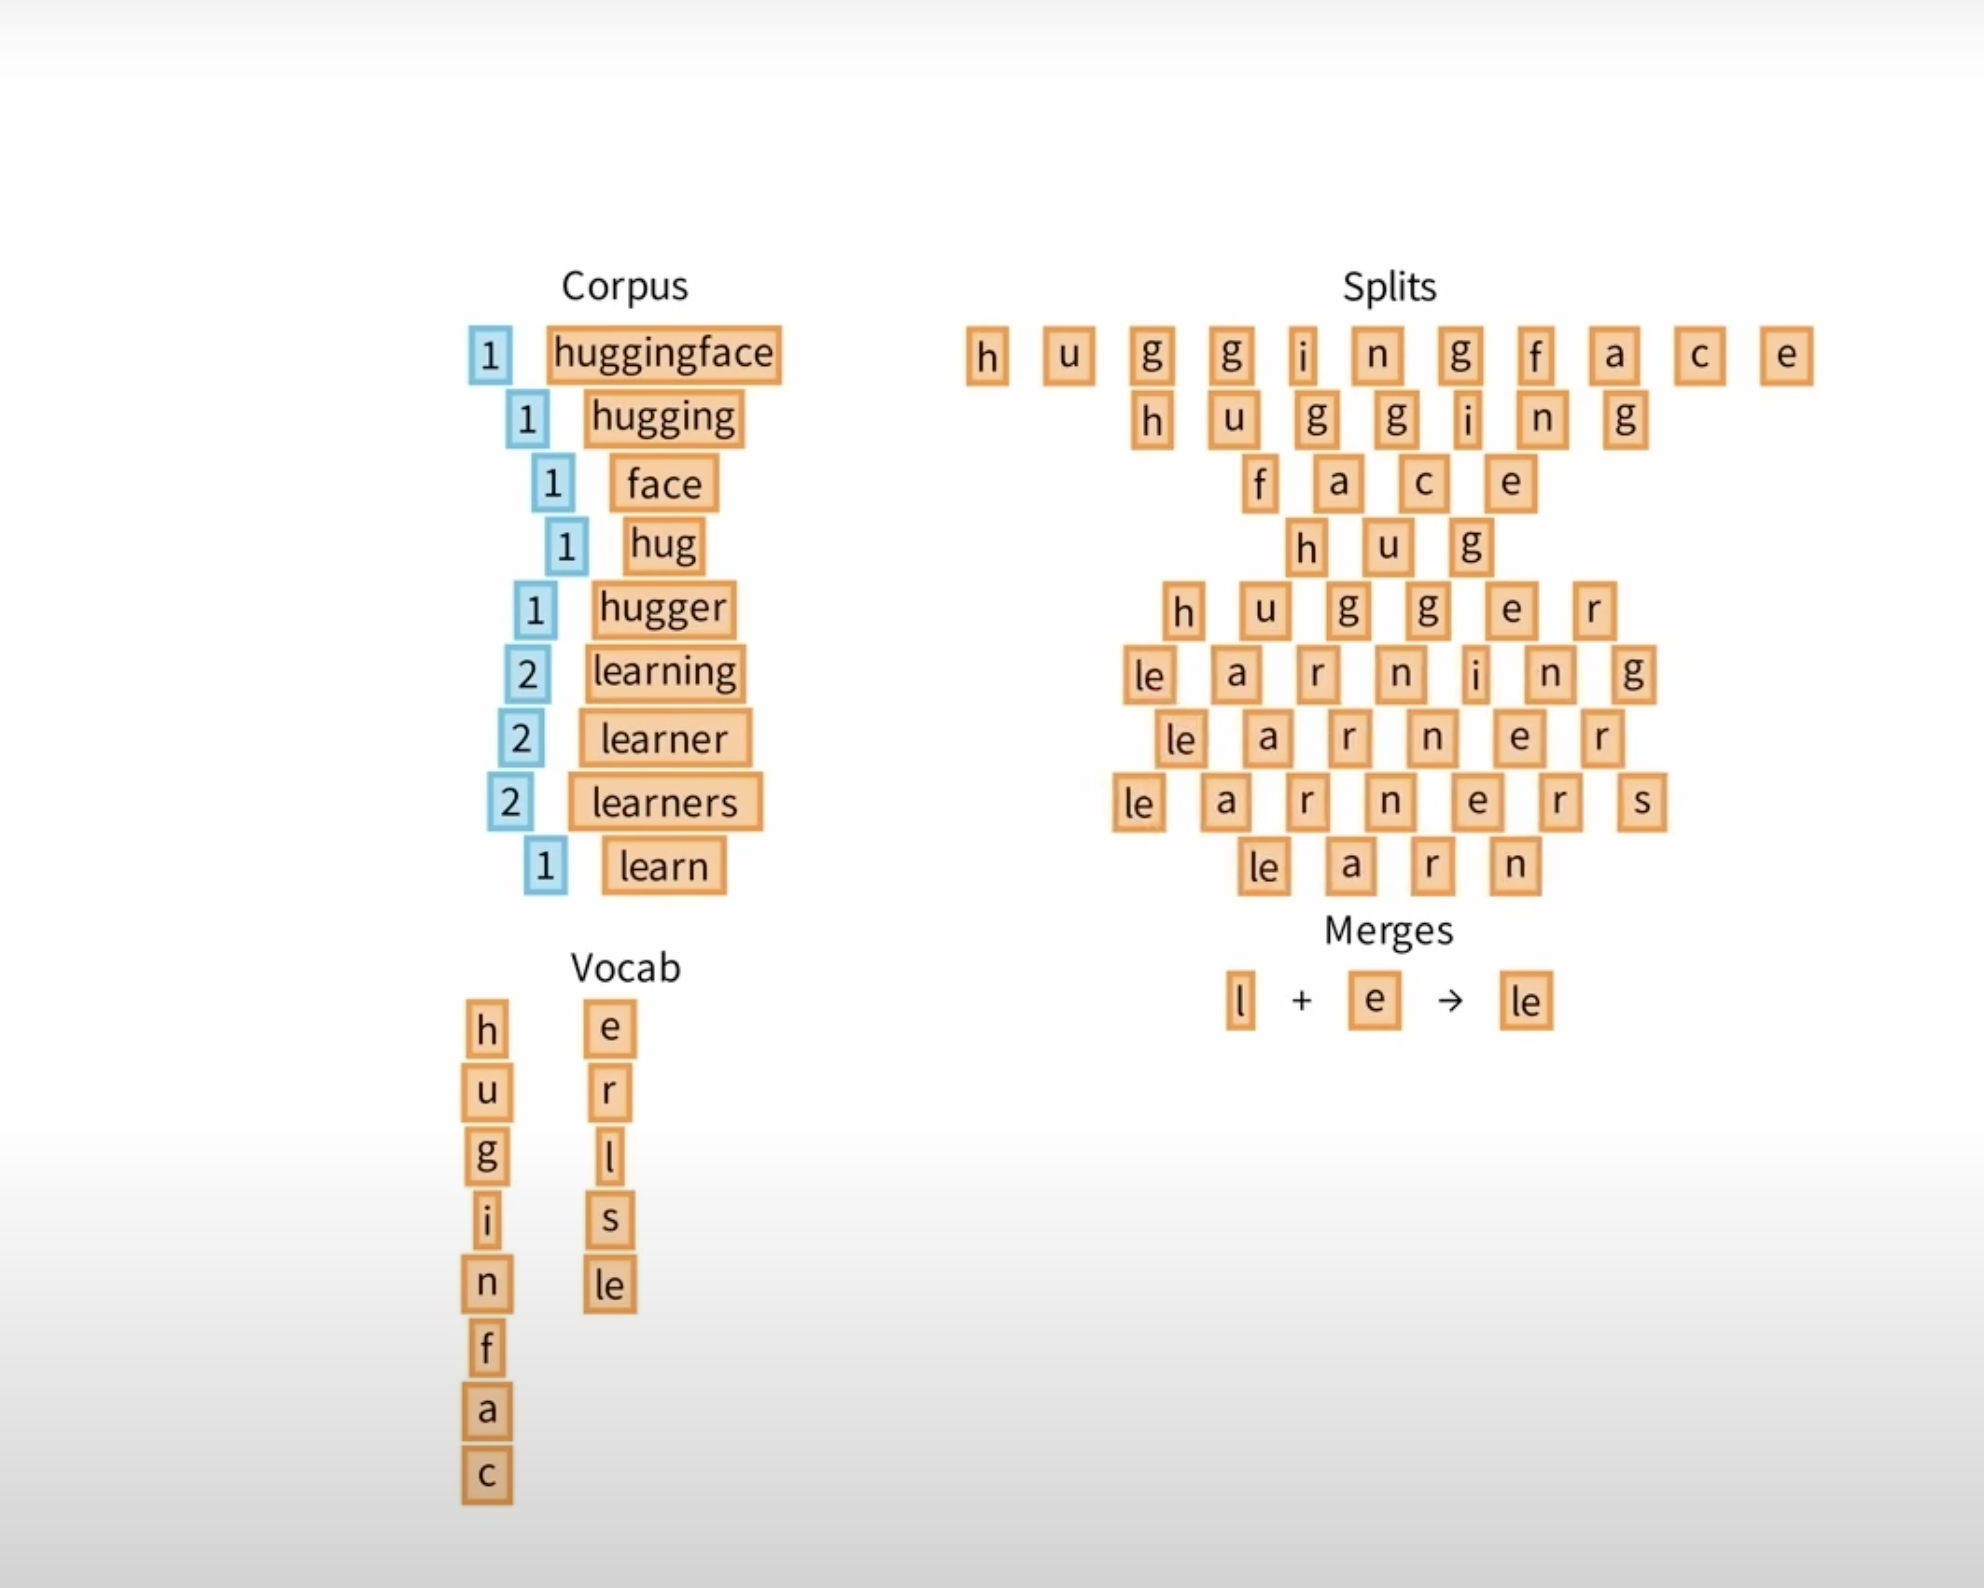

In [ ]:
indic_dataset = indic_dataset['train'].train_test_split(test_size=0.1)

In [ ]:
from tokenizers import (
    decoders,
    models,
    normalizers,
    pre_tokenizers,
    processors,
    trainers,
    Tokenizer,
)

tokenizer = Tokenizer(models.BPE())


In [ ]:
indic_dataset

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 1636289
    })
    test: Dataset({
        features: ['text'],
        num_rows: 181810
    })
})

In [ ]:
tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel(add_prefix_space=False)
tokenizer.pre_tokenizer.pre_tokenize_str("জায়গামতো পৌঁছানো গেছে মনে করে মনে মনে হাঁফ ছাড়ে বরকত আলী।")

[('à¦ľ', (0, 1)),
 ('à¦¾', (1, 2)),
 ('à§Łà¦Ĺ', (2, 4)),
 ('à¦¾', (4, 5)),
 ('à¦®à¦¤', (5, 7)),
 ('à§ĭ', (7, 8)),
 ('Ġà¦ª', (8, 10)),
 ('à§ĩà§Ĺà¦ģ', (10, 13)),
 ('à¦Ľ', (13, 14)),
 ('à¦¾', (14, 15)),
 ('à¦¨', (15, 16)),
 ('à§ĭ', (16, 17)),
 ('Ġà¦Ĺ', (17, 19)),
 ('à§ĩ', (19, 20)),
 ('à¦Ľ', (20, 21)),
 ('à§ĩ', (21, 22)),
 ('Ġà¦®à¦¨', (22, 25)),
 ('à§ĩ', (25, 26)),
 ('Ġà¦ķà¦°', (26, 29)),
 ('à§ĩ', (29, 30)),
 ('Ġà¦®à¦¨', (30, 33)),
 ('à§ĩ', (33, 34)),
 ('Ġà¦®à¦¨', (34, 37)),
 ('à§ĩ', (37, 38)),
 ('Ġà¦¹', (38, 40)),
 ('à¦¾à¦ģ', (40, 42)),
 ('à¦«', (42, 43)),
 ('Ġà¦Ľ', (43, 45)),
 ('à¦¾', (45, 46)),
 ('à§ľ', (46, 47)),
 ('à§ĩ', (47, 48)),
 ('Ġà¦¬à¦°à¦ķà¦¤', (48, 53)),
 ('Ġà¦Ĩà¦²', (53, 56)),
 ('à§Ģà¥¤', (56, 58))]

In [ ]:
#doesn't show progress unfortunately

trainer = trainers.BpeTrainer(vocab_size=50000, special_tokens=["<|endoftext|>"])
tokenizer.train_from_iterator(indic_dataset['train']['text'], trainer=trainer)

In [ ]:
tokenizer.post_processor = processors.ByteLevel(trim_offsets=False)

In [ ]:
encoding = tokenizer.encode("জায়গামতো পৌঁছানো গেছে মনে করে মনে মনে হাঁফ ছাড়ে বরকত আলী।")
print(encoding.tokens)

['à¦ľ', 'à¦¾', 'à§Łà¦Ĺ', 'à¦¾', 'à¦®à¦¤', 'à§ĭ', 'Ġà¦ª', 'à§ĩà§Ĺà¦ģ', 'à¦Ľ', 'à¦¾', 'à¦¨', 'à§ĭ', 'Ġà¦Ĺ', 'à§ĩ', 'à¦Ľ', 'à§ĩ', 'Ġà¦®à¦¨', 'à§ĩ', 'Ġà¦ķà¦°', 'à§ĩ', 'Ġà¦®à¦¨', 'à§ĩ', 'Ġà¦®à¦¨', 'à§ĩ', 'Ġà¦¹', 'à¦¾à¦ģ', 'à¦«', 'Ġà¦Ľ', 'à¦¾', 'à§ľ', 'à§ĩ', 'Ġà¦¬à¦°à¦ķà¦¤', 'Ġà¦Ĩà¦²', 'à§Ģà¥¤']


In [ ]:
sentence = "জায়গামতো পৌঁছানো গেছে মনে করে মনে মনে হাঁফ ছাড়ে বরকত আলী।"
encoding = tokenizer.encode(sentence)
start, end = encoding.offsets[4]
sentence[start:end]

'মত'

In [ ]:
tokenizer.decoder = decoders.ByteLevel()

tokenizer.decode(encoding.ids)

'জায়গামতো পৌঁছানো গেছে মনে করে মনে মনে হাঁফ ছাড়ে বরকত আলী।'

In [ ]:
from transformers import PreTrainedTokenizerFast

fast_tokenizer = PreTrainedTokenizerFast(tokenizer_object=tokenizer,bos_token="<|endoftext|>",
    eos_token="<|endoftext|>")

In [ ]:
def tokenize(element):
    outputs = fast_tokenizer(
        element['text'],
        truncation=True,
        max_length=128,
        return_overflowing_tokens=True,
        return_length=True,
    )
    input_batch = []
    for length, input_ids in zip(outputs["length"], outputs["input_ids"]):
        if length == 128:
            input_batch.append(input_ids)
    return {"input_ids": input_batch}


tokenized_datasets = indic_dataset.map(
    tokenize, batched=True, remove_columns=indic_dataset["train"].column_names
)
tokenized_datasets

  0%|          | 0/1637 [00:00<?, ?ba/s]

  0%|          | 0/182 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids'],
        num_rows: 241162
    })
    test: Dataset({
        features: ['input_ids'],
        num_rows: 26633
    })
})

In [ ]:
tokenized_datasets['train']['input_ids'][0]

[39628,
 17591,
 1219,
 244,
 239,
 4411,
 12635,
 230,
 355,
 244,
 239,
 803,
 273,
 1388,
 220,
 244,
 230,
 287,
 220,
 545,
 13,
 278,
 220,
 545,
 300,
 220,
 4130,
 235,
 231,
 273,
 278,
 791,
 662,
 235,
 355,
 352,
 230,
 951,
 512,
 239,
 1426,
 220,
 261,
 220,
 302,
 343,
 244,
 242,
 244,
 242,
 1650,
 420,
 230,
 250,
 273,
 299,
 273,
 27411,
 792,
 22,
 2314,
 420,
 343,
 4193,
 791,
 329,
 610,
 512,
 239,
 379,
 1110,
 261,
 220,
 330,
 220,
 302,
 626,
 410,
 239,
 610,
 685,
 220,
 278,
 1110,
 355,
 302,
 273,
 379,
 220,
 1823,
 817,
 951,
 420,
 343,
 4193,
 791,
 329,
 244,
 235,
 299,
 220,
 1857,
 791,
 293,
 287,
 235,
 250,
 343,
 6509,
 235,
 231,
 343,
 3834,
 28306,
 308,
 235,
 231,
 273,
 278,
 230,
 1061,
 378,
 220,
 264,
 220,
 1323,
 220,
 244]

In [ ]:
from transformers import AutoTokenizer, GPT2LMHeadModel, AutoConfig

config = AutoConfig.from_pretrained(
    'gpt2',
    vocab_size=len(fast_tokenizer),
    n_ctx=128,
    bos_token_id=fast_tokenizer.bos_token_id,
    eos_token_id=fast_tokenizer.eos_token_id,
)

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

In [ ]:
model = GPT2LMHeadModel(config)
model_size = sum(t.numel() for t in model.parameters())
print(f"GPT-2 size: {model_size/1000**2:.1f}M parameters")

GPT-2 size: 131.9M parameters


In [ ]:
#ques: what is the need for the data collator?


from transformers import DataCollatorForLanguageModeling

#for some reason this doesn't work
fast_tokenizer.pad_token = fast_tokenizer.eos_token
data_collator = DataCollatorForLanguageModeling(fast_tokenizer, mlm=False)


In [ ]:
out = data_collator([tokenized_datasets["train"][i] for i in range(5)])
for key in out:
    print(f"{key} shape: {out[key].shape}")


You're using a PreTrainedTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


input_ids shape: torch.Size([5, 128])
attention_mask shape: torch.Size([5, 128])
labels shape: torch.Size([5, 128])


In [ ]:
from huggingface_hub import notebook_login

notebook_login()


Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.huggingface/token
Login successful


In [ ]:
from transformers import Trainer, TrainingArguments

args = TrainingArguments(
    output_dir="indic-gpt/",
    per_device_train_batch_size=128,
    per_device_eval_batch_size=128,
    evaluation_strategy="steps",
    eval_steps=5000,
    logging_steps=5000,
    gradient_accumulation_steps=8,
    num_train_epochs=1,
    weight_decay=0.1,
    warmup_steps=1000,
    lr_scheduler_type="cosine",
    learning_rate=5e-4,
    save_steps=5000,
    fp16=True,
    push_to_hub=True,
)

trainer = Trainer(
    model=model,
    tokenizer=fast_tokenizer,
    args=args,
    data_collator=data_collator,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
/content/indic-gpt/ is already a clone of https://huggingface.co/aashay96/indic-gpt. Make sure you pull the latest changes with `repo.git_pull()`.
Using cuda_amp half precision backend


In [ ]:
trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 1681591
  Num Epochs = 1
  Instantaneous batch size per device = 128
  Total train batch size (w. parallel, distributed & accumulation) = 1024
  Gradient Accumulation steps = 8
  Total optimization steps = 1642
  Number of trainable parameters = 131922432


Saving model checkpoint to indic-gpt/checkpoint-200
Configuration saved in indic-gpt/checkpoint-200/config.json
Model weights saved in indic-gpt/checkpoint-200/pytorch_model.bin
tokenizer config file saved in indic-gpt/checkpoint-200/tokenizer_config.json
Special tokens file saved in indic-gpt/checkpoint-200/special_tokens_map.json
tokenizer config file saved in indic-gpt/tokenizer_config.json
Special tokens file saved in indic-gpt/special_tokens_map.json
Several commits (3) will be pushed upstream.
Saving model checkpoint to indic-gpt/checkpoint-400
Configuration saved in indic-gpt/checkpoint-400/config.json
Model weights saved in indic-gpt/checkpoint-400/pytorch_model.bin
tokenizer config file saved in indic-gpt/checkpoint-400/tokenizer_config.json
Special tokens file saved in indic-gpt/checkpoint-400/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 187231
  Batch size = 128
Saving model checkpoint to indic-gpt/checkpoint-600
Configuration saved in indic-gpt/ch

TrainOutput(global_step=1642, training_loss=2.491443406359432, metrics={'train_runtime': 4251.4905, 'train_samples_per_second': 395.53, 'train_steps_per_second': 0.386, 'total_flos': 1.09834628235264e+17, 'train_loss': 2.491443406359432, 'epoch': 1.0})

In [ ]:
trainer.push_to_hub()

Saving model checkpoint to indic-gpt/
Configuration saved in indic-gpt/config.json
Model weights saved in indic-gpt/pytorch_model.bin
tokenizer config file saved in indic-gpt/tokenizer_config.json
Special tokens file saved in indic-gpt/special_tokens_map.json
Several commits (4) will be pushed upstream.
The progress bars may be unreliable.


Upload file pytorch_model.bin:   0%|          | 3.30k/515M [00:00<?, ?B/s]

Upload file runs/Dec22_10-11-35_40549f43bb54/events.out.tfevents.1671703904.40549f43bb54.1064.13:  60%|###### …

remote: Scanning LFS files for validity, may be slow...        
remote: LFS file scan complete.        
To https://huggingface.co/aashay96/indic-gpt
   8dab26e..6693b9d  main -> main

remote: LFS file scan complete.        
To https://huggingface.co/aashay96/indic-gpt
   8dab26e..6693b9d  main -> main

Dropping the following result as it does not have all the necessary fields:
{'task': {'name': 'Causal Language Modeling', 'type': 'text-generation'}}
To https://huggingface.co/aashay96/indic-gpt
   6693b9d..07e4411  main -> main

   6693b9d..07e4411  main -> main



'https://huggingface.co/aashay96/indic-gpt/commit/6693b9dbf14b8036692ca0477ff44fd1a9e3bd4b'

TODO:

Create a script for benchmarking the model on the following dataset - https://huggingface.co/spaces/evaluate-metric/indic_glue